<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Stock_Market_Analytics_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install quandl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import requests

In [ ]:
plt.style.use('fivethirtyeight')
cap='BSE100'

In [ ]:
#@title Download from BSE
def download_from_BSE(datadump,startdate):
    data= {}
    df=pd.DataFrame()
    
    print(f'len of datadump {len(datadump)}')
    try:
      for i in range(len(datadump)):
          data[datadump[i]]= quandl.get('BSE/BOM'+datadump[i],start_date=startdate, authtoken="1Mz3xLNFNdUpKENCkArB")['Close']
          
          
      i=0
      for key , value in data.items():
        df.insert(i, key, value)
        i=i+1
    except NotFoundError:
      print('Not Found')

    return df

In [ ]:
#@title Rejected Scrips
rejectlst= ['543253','543213','543210','543233','543252','543249','543212','543242','543248','543066','543232','542759','543223','543238',\
            '543243','543235','543245','543220','543237','543240','543227','543228','543066',\
            ]

In [ ]:
#@title Sectors
def get_bse_sector_list(data):
  if data=='LargeCap':
    url ='https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=93'
  if data== 'MidCap':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=81' 
  if data== 'SmallCap':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=82'
  if data == 'BSE100':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=22'
  
  header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
  }

  r = requests.get(url, headers=header)

  dfs = pd.read_html(r.text)  
  dataframe=dfs[1]
  dataframe.columns=dataframe.iloc[0]
  scrip_code=dataframe['Scrip Code'].tolist()
  scrip_code.remove('Scrip Code')
  #scrip_code = [int(i) for i in scrip_code]
  return scrip_code

In [ ]:
datadump=get_bse_sector_list('BSE100')
startdate='2021-07-10'

In [ ]:
#@title Feature Engineering
def do_feature_engineering(datadump,startdate,rejectlst=rejectlst):
  datadump=[i for i in datadump if i not in rejectlst]
  data=download_from_BSE(datadump,startdate)
  prices=data.copy()
  return prices

In [ ]:
prices=do_feature_engineering(datadump,startdate,rejectlst)
rs = prices.apply(np.log).diff(1)

len of datadump 101


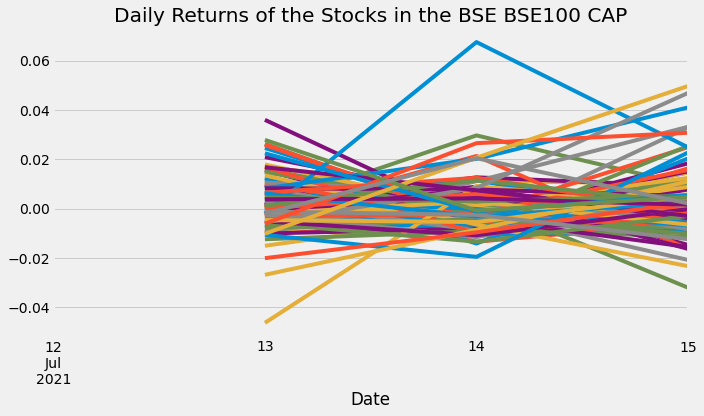

In [ ]:
rs.plot(legend=0, figsize=(10,6), grid=True, title=f'Daily Returns of the Stocks in the BSE {cap} CAP')
plt.tight_layout()
plt.savefig('tmp.png')

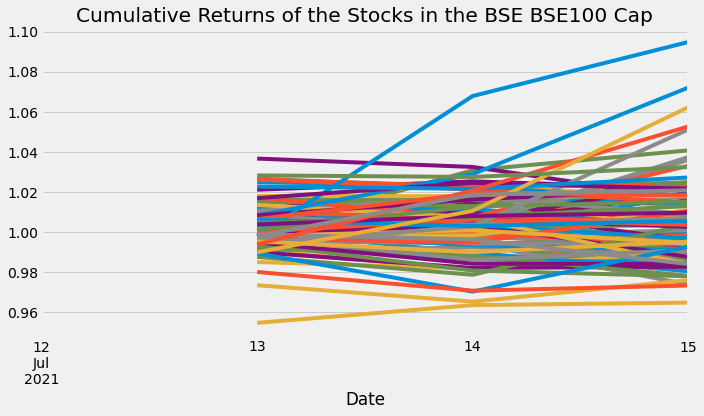

In [ ]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title=f'Cumulative Returns of the Stocks in the BSE {cap} Cap')
plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(1).fit(rs.fillna(0))

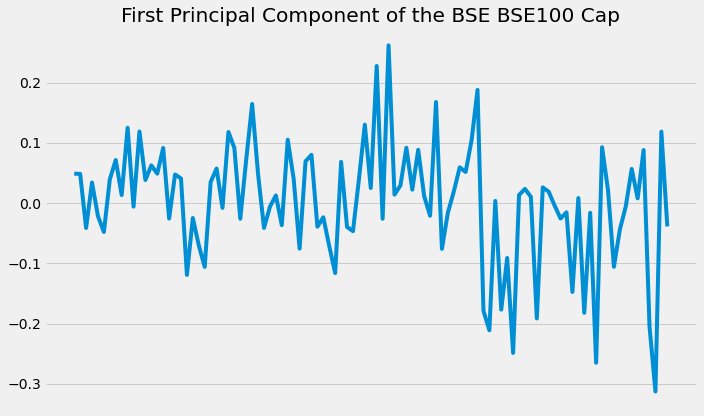

In [ ]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title=f'First Principal Component of the BSE {cap} Cap')
plt.tight_layout()
plt.savefig('tmp.png')

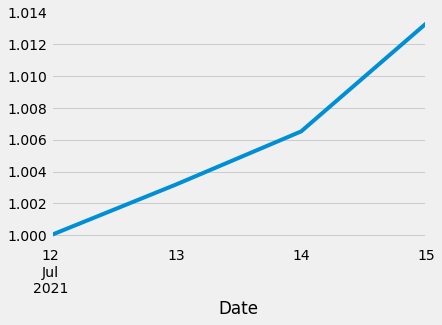

In [ ]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [ ]:

prices=quandl.get('BSE/'+ 'BSE100',start_date=startdate, authtoken="1Mz3xLNFNdUpKENCkArB")['Close']
#prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

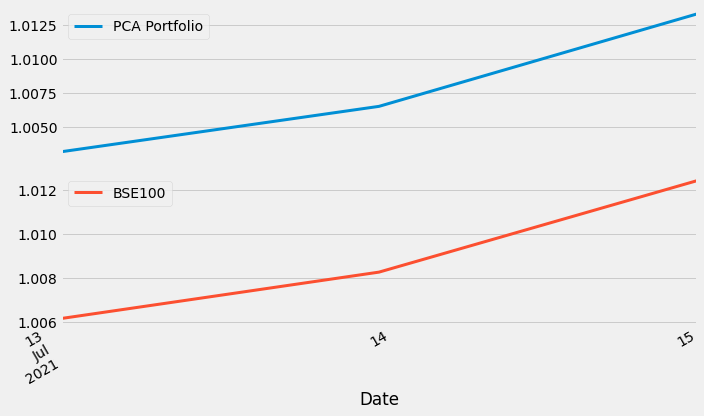

In [ ]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "BSE100"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

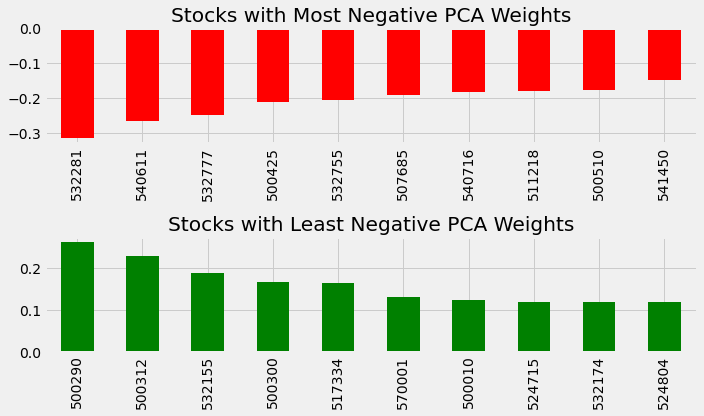

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='red', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='green', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

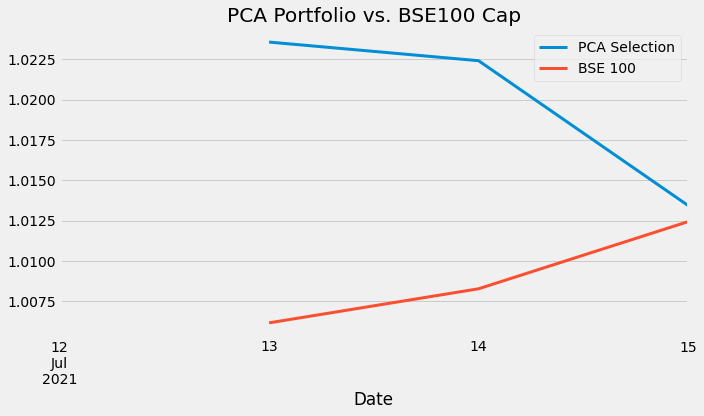

In [ ]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title=f'PCA Portfolio vs. {cap} Cap')
prices.apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'BSE 100'])

plt.tight_layout()
plt.savefig('tmp.png')

In [ ]:
top10=pc1.nlargest(10).index.tolist()



In [ ]:
#@title Sectors
def get_bse_scrip_name(data):

  
  if data=='LargeCap':
    url ='https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=93'
  if data== 'MidCap':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=81' 
  if data== 'SmallCap':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=82'
  if data == 'BSE100':
    url = 'https://www.bseindia.com/sensex/Index_Contribution.aspx?index_code=22'
  
  header = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
  }

  r = requests.get(url, headers=header)
  directory={}
  dfs = pd.read_html(r.text)  
  dataframe=dfs[1]
  dataframe.columns=dataframe.iloc[0]
  print(dataframe.columns)
  company=dataframe['Company'].tolist()
  company.remove('Company')
  scrip= dataframe['Scrip Code'].tolist()
  scrip.remove('Scrip Code')
  for i,j in zip(scrip,company):
    directory[i]=j
  #scrip_code = [int(i) for i in scrip_code]
  return directory

In [ ]:
directory=get_bse_scrip_name('BSE100')

Index(['Scrip Code', 'Company', 'LTP', 'Change Val', 'Pts Contribution'], dtype='object', name=0)


In [ ]:
for item in top10:
  print(directory[item])

MRF
ONGC
GAIL
GRASIM
MOTHERSUMI
TATAMTRDVR
HDFC
SUNPHARMA
ICICIBANK
AUROPHARMA


Date
2021-07-12         NaN
2021-07-13    0.023294
2021-07-14   -0.001129
2021-07-15   -0.008812
dtype: float64

### Portfolio as on 16 07 2021


*  MRF
*  ONGC
*  GAIL
*  GRASIM
*  MOTHERSUMI
*  TATAMTRDVR
*  HDFC
*  SUNPHARMA
*  ICICIBANK
*  AUROPHARMA






